# Assignment 1

In [1]:
# first, install the necessary packages in the terminal using the following commands
# sudo apt-get update
# sudo apt-get install -y python3-opencv
# pip install opencv-python matplotlib
# pip install pandas

In [2]:
import os
import sys
sys.path.append("../../..")
# openCV
import cv2
# numpy
import numpy as np
# class util functions
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
# plotting
import matplotlib.pyplot as plt
# pandas for making dataframes
import pandas as pd

In [3]:
#creating a filepath to the specific image we are working with. the .jpg can be replaced with another from the same directory
filepath = os.path.join("..", "..", "..", "..", "..", "cds-vis-data", "flowers", "image_1243.jpg")

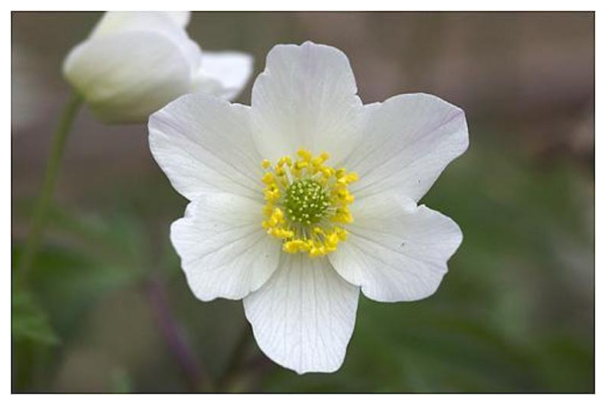

In [4]:
image_flower = cv2.imread(filepath)
show(image_flower)

In [5]:
# create a histogram for the chosen flower imge
hist_flower = cv2.calcHist([image_flower], [0,1,2], None, [255,255,255], [0,256, 0,256, 0,256])
normalized_hist_flower = cv2.normalize(hist_flower, hist_flower, 0, 1.0, cv2.NORM_MINMAX)

In [6]:
# loop to make normalized histograms for every file
datapath_data = os.path.join("..", "..", "..", "..", "..", "cds-vis-data", "flowers")
filelist_data = sorted(os.listdir(datapath_data))
# make empty list for distance scores to be added to
distance_scores = []

for files in filelist_data:
    filepath_data = datapath_data + "/" + files
    image_data = cv2.imread(filepath_data)
    hist_data = cv2.calcHist([image_data], [0,1,2], None, [255,255,255], [0,256, 0,256, 0,256])
    normalized_hist_data = cv2.normalize(hist_data, hist_data, 0, 1.0, cv2.NORM_MINMAX)
    distance = round(cv2.compareHist(normalized_hist_flower, normalized_hist_data, cv2.HISTCMP_CHISQR), 2)

    # create list for every file
    file_info = [files, distance]
    # append the file's info to the collected list for the whole folder's info
    distance_scores.append(file_info)

# creating a dataframe with pandas using folder_info
df = pd.DataFrame(distance_scores,
                    columns=["Filename", "Distance"])

# sort the dataframe by shortest distance, and show the first 5 results apart from the flower we selected in the beginning
df = df.sort_values(by=['Distance'])[1:6]

# upload dataframe to output folder
outpath = os.path.join("..", "output", "flowercomparison.csv")
df.to_csv(outpath)

In [7]:
# show dataframe
df

,Filename,Distance
1201,image_1202.jpg,376.49
188,image_0189.jpg,479.86
531,image_0532.jpg,504.91
60,image_0061.jpg,505.77
524,image_0525.jpg,506.59


In [11]:
type("Filename")

str

In [20]:
filename_similar_flower = df.iloc[0, 0]
print(filename_similar_flower)

image_1202.jpg


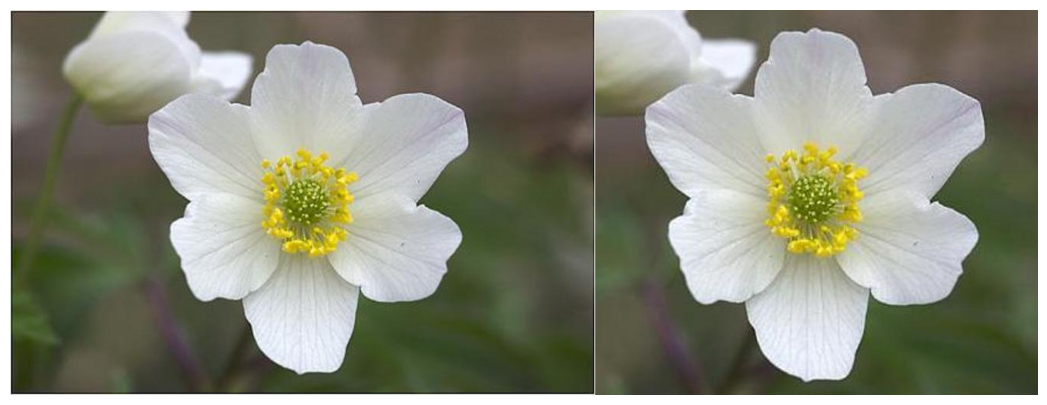

image_1202.jpg


In [24]:
# printing our flower with the most similar flower

# taking the filename of the most similar flower from the dataframe
filename_similar_flower = df.iloc[0, 0]
for flower in df:
    similar_flower = datapath_data + "/" + filename_similar_flower
    image_similar_flower = cv2.imread(similar_flower)

comparison = np.hstack([image_flower, image_similar_flower])
show(comparison)
print(filename_similar_flower)